# compare JRA and panan landmask

In [1]:
import xesmf
import xarray as xr
import os
import cmocean as cm
import cartopy.crs as ccrs
from dask.distributed import Client
import dask.array as da
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt


In [2]:
land_mask_panan = xr.open_dataset('/g/data/ol01/cy8964/access-om3/archive/8km_jra_ryf_obc_Charrassin/output000/ocean_geometry.nc')

In [3]:
panan_runoff = xr.open_dataset('/g/data/ol01/cy8964/access-om3/archive/8km_jra_ryf_obc_Charrassin/output000/access-om3.mom6.2d.lrunoff.1day.mean.1900.nc', 
                              decode_times = False)
panan_runoffmask = panan_runoff.lrunoff.isel(time = 0).where(panan_runoff.lrunoff.isel(time = 0)!=0)*0+1


In [4]:
JRA55_runoff = xr.open_dataset('/g/data/ik11/inputs/JRA-55/RYF/v1-4/RYF.friver.1990_1991.nc')

In [5]:
JRAcoastmask = JRA55_runoff.friver.isel(time = 0).where(JRA55_runoff.friver.isel(time = 0)!=0).sel(lat = slice(-90,37.5))*0+1


Text(0.5, 1.0, 'Black - runoff from JRA; Colours - ocean/land mask from model')

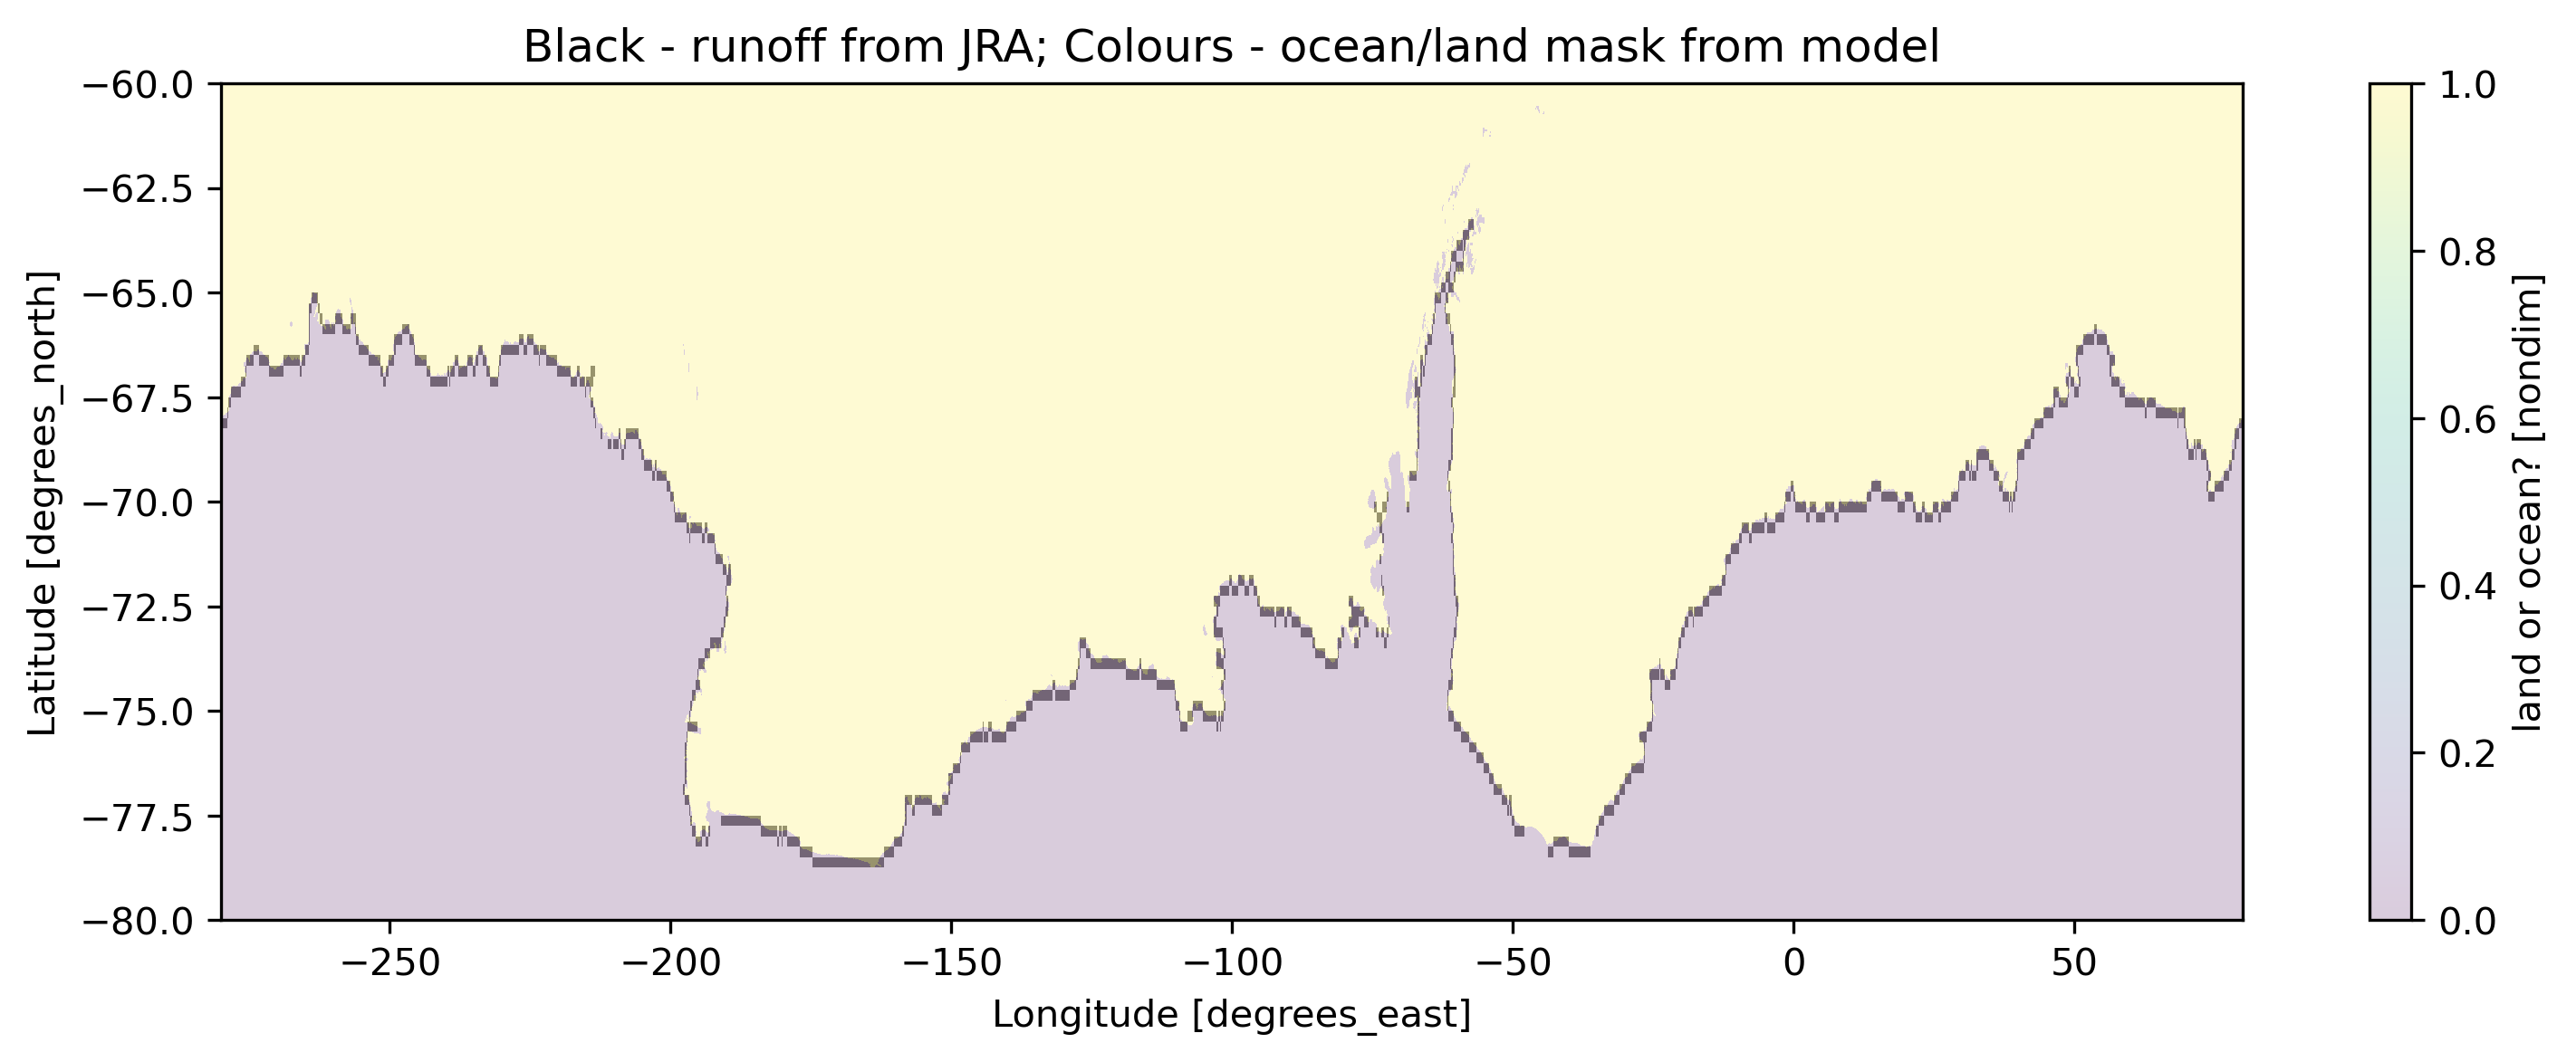

In [9]:
fig,axes = plt.subplots(figsize = (12,4),dpi = 300)
plt.pcolormesh(JRAcoastmask.lon,JRAcoastmask.lat,JRAcoastmask, cmap = 'Greys_r', vmax = 1, alpha = 0.5)
plt.pcolormesh(JRAcoastmask.lon-360,JRAcoastmask.lat,JRAcoastmask, cmap = 'Greys_r', vmax = 1, alpha = 0.5)
land_mask_panan.wet.plot(alpha = 0.2)

plt.ylim(-80,-60)
plt.title('Black - runoff from JRA; Colours - ocean/land mask from model')

Text(0.5, 1.0, 'Red - runoff from model; Grey - runoff from JRA')

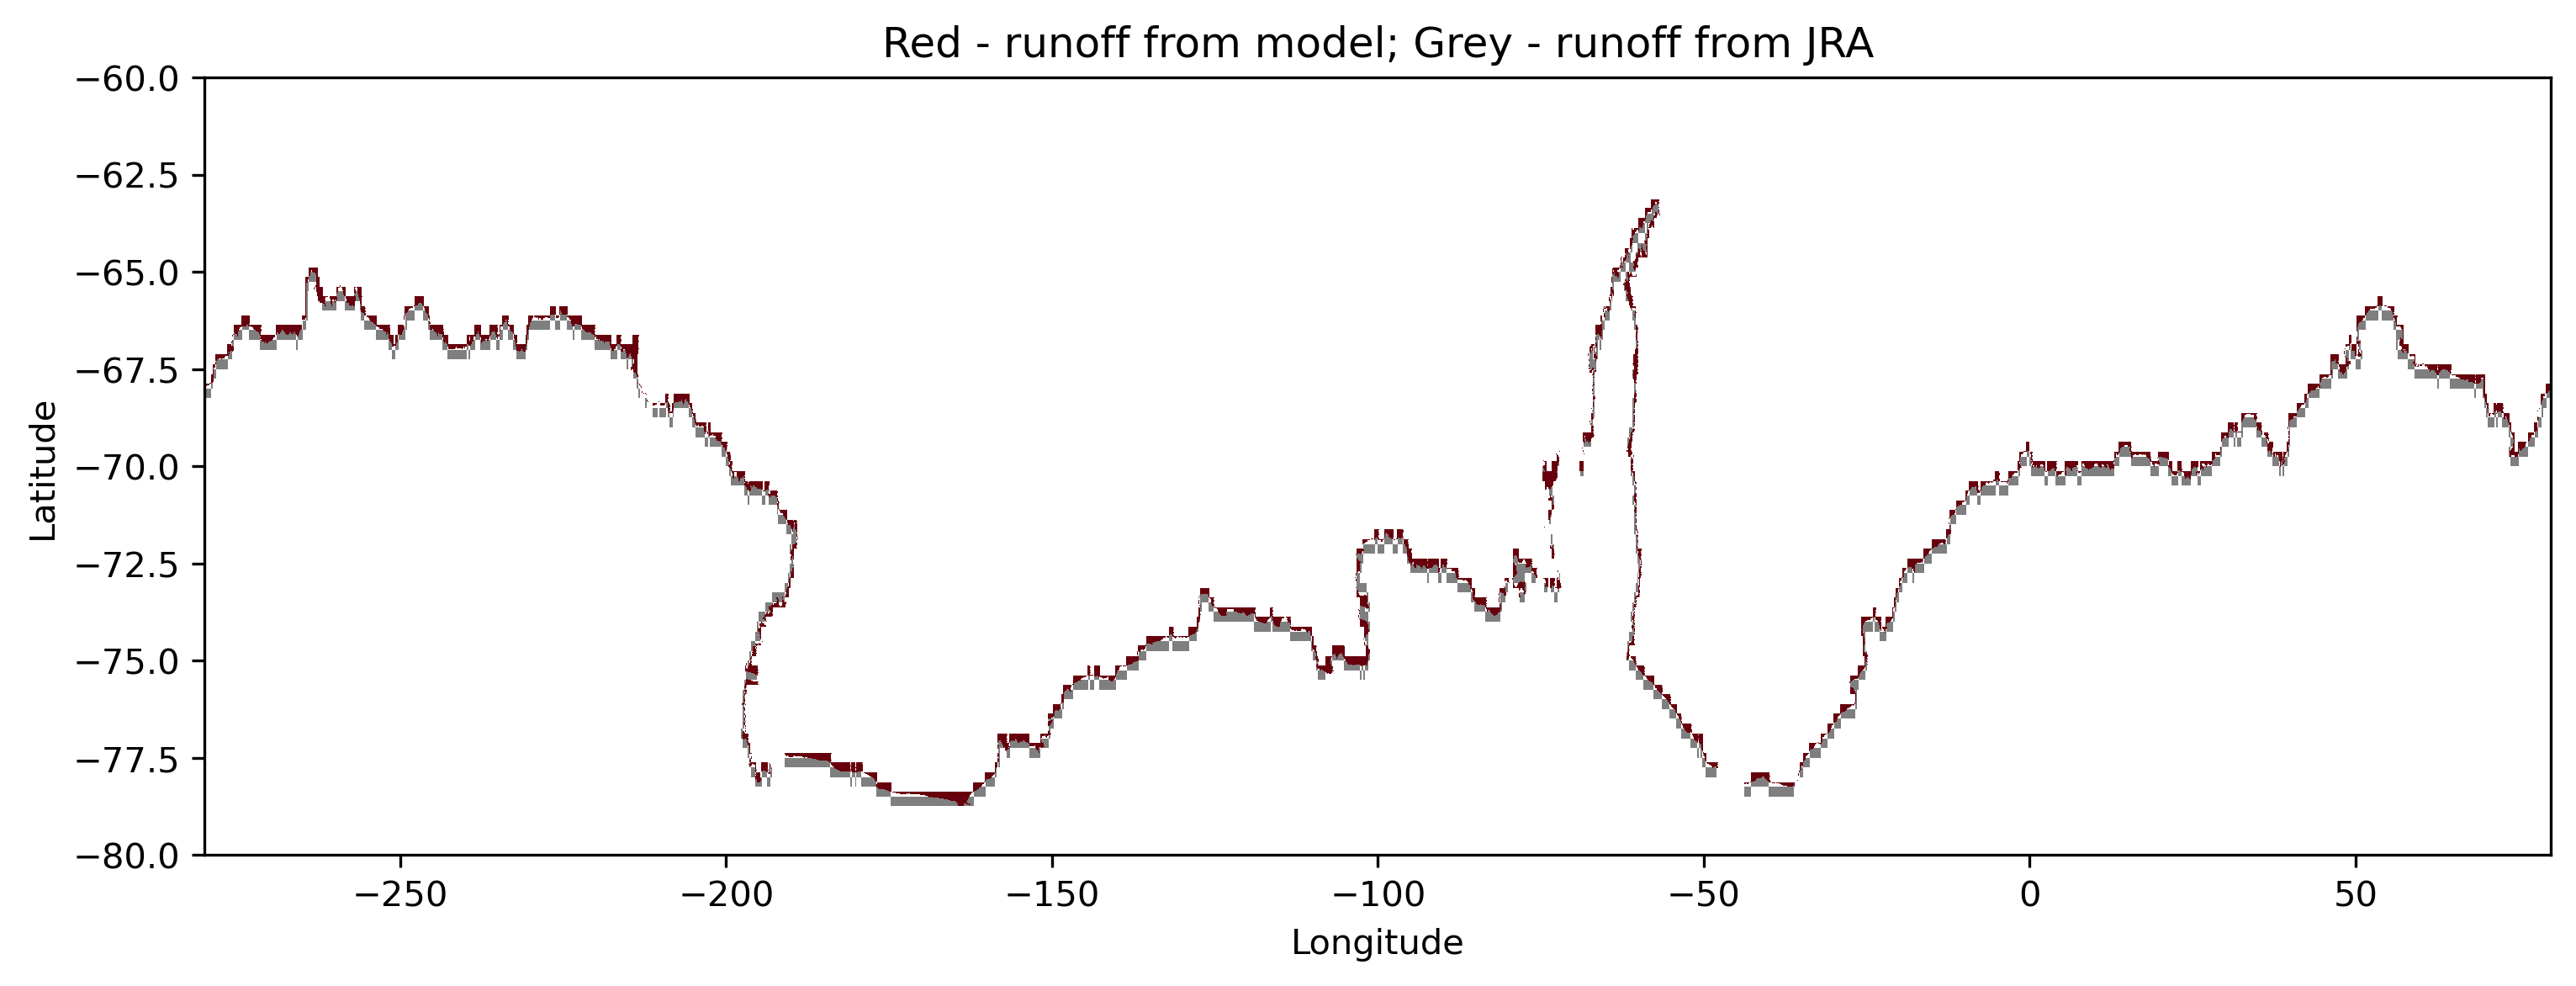

In [7]:
fig,axes = plt.subplots(figsize = (12,4),dpi = 300)
plt.pcolormesh(JRAcoastmask.lon,JRAcoastmask.lat,JRAcoastmask, cmap = 'Greys_r', vmax = 1, alpha = 0.5,shading='nearest')
plt.pcolormesh(JRAcoastmask.lon-360,JRAcoastmask.lat,JRAcoastmask, cmap = 'Greys_r', vmax = 1, alpha = 0.5,shading='nearest')

plt.pcolormesh(panan_runoffmask.xh,panan_runoffmask.yh,panan_runoffmask, cmap = 'Reds_r', vmax = 1,shading='nearest')

plt.ylim(-80,-60)
plt.xlim(-280,80)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Red - runoff from model; Grey - runoff from JRA')

Text(0.5, 1.0, 'Orange - runoff from model; Colours - ocean/land mask from model')

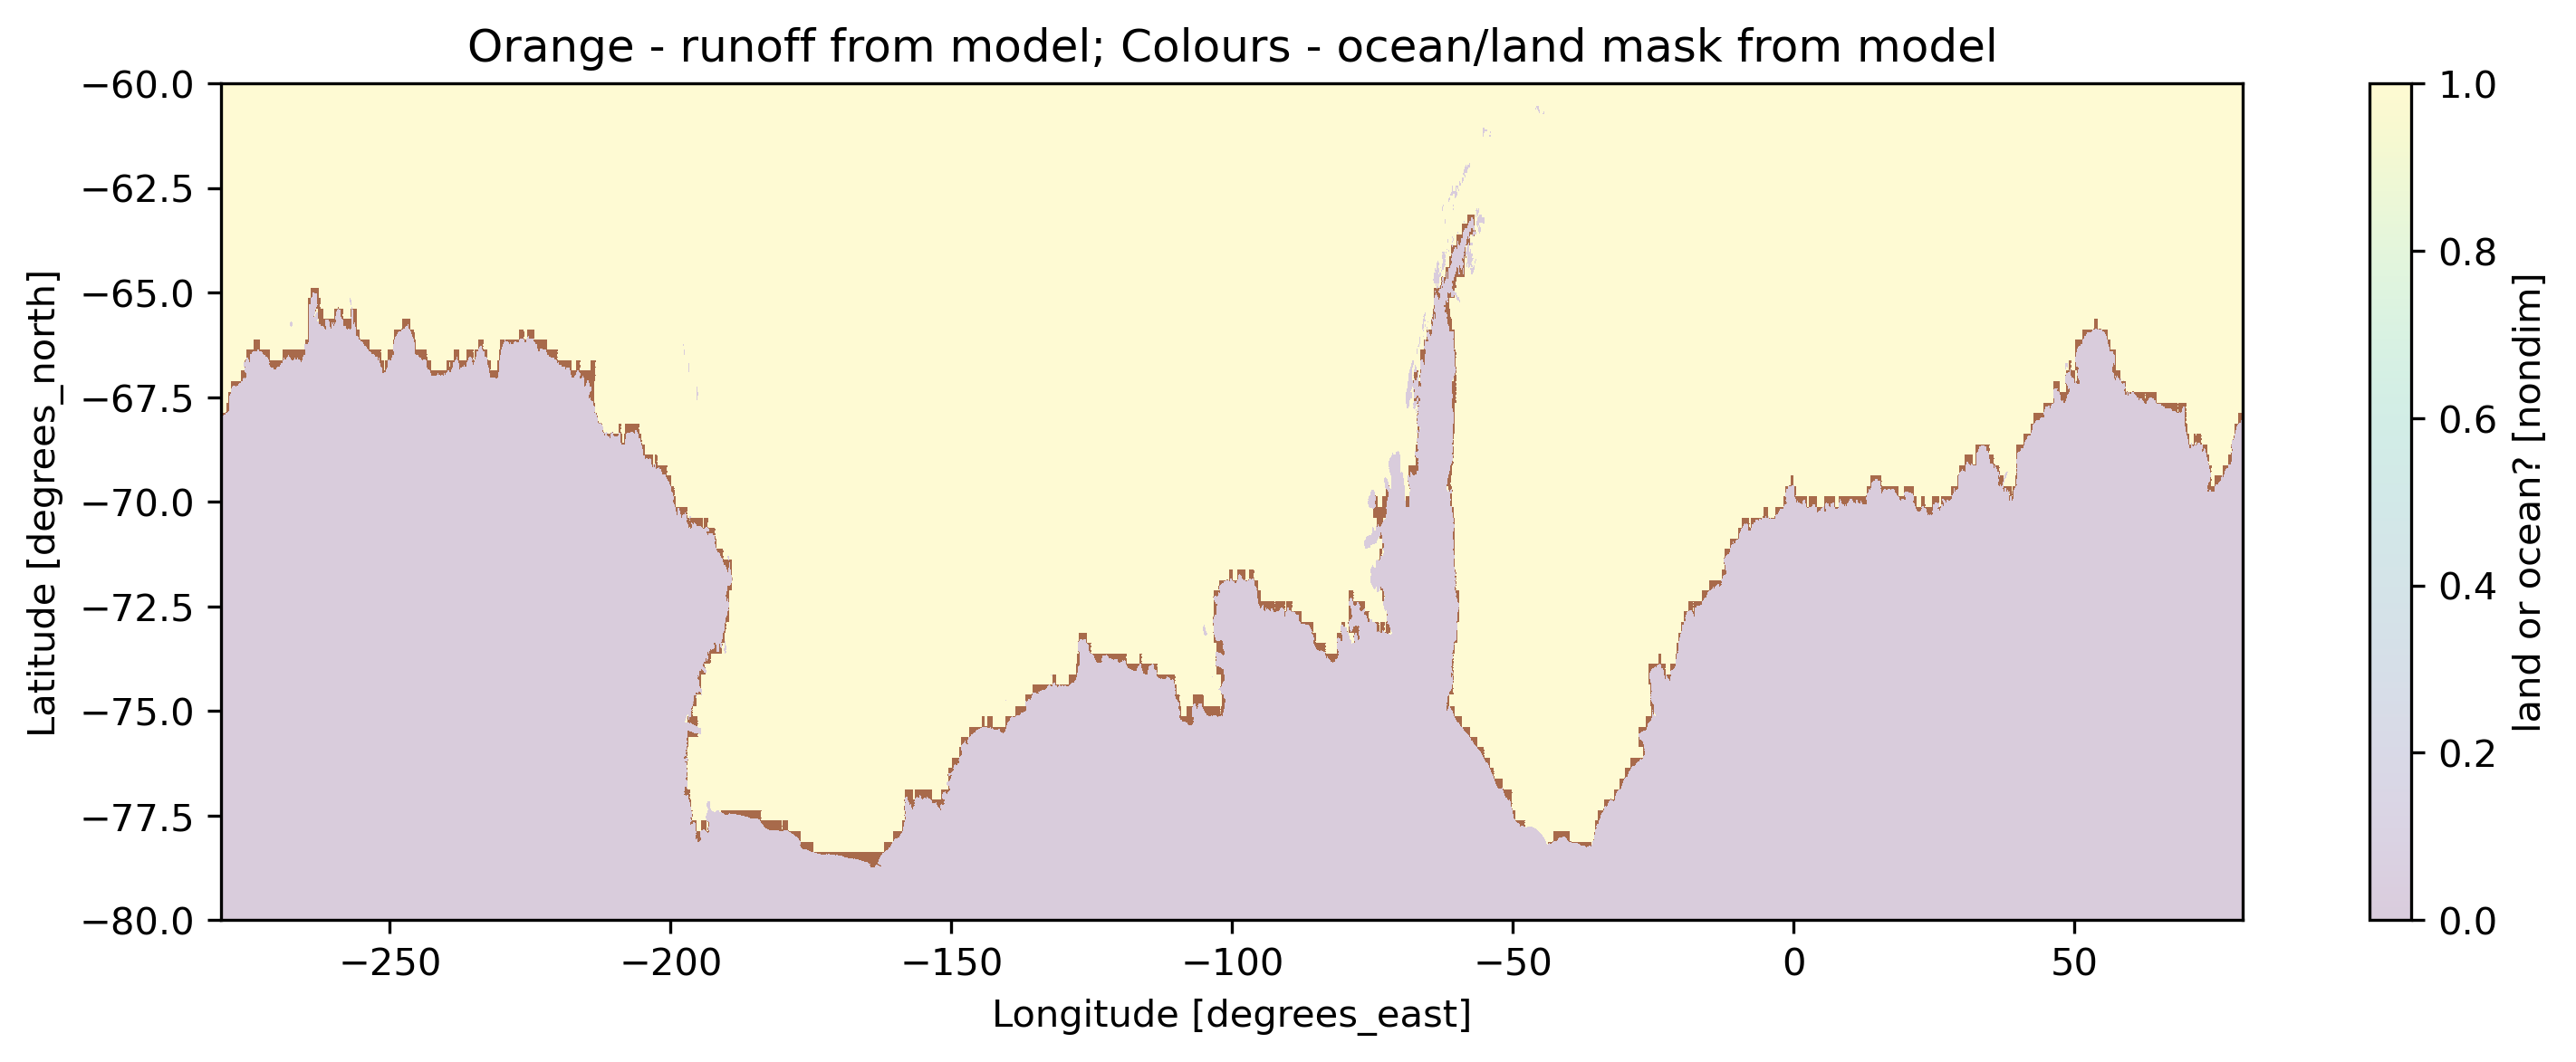

In [12]:
fig,axes = plt.subplots(figsize = (12,4),dpi = 300)
plt.pcolormesh(panan_runoffmask.xh,panan_runoffmask.yh,panan_runoffmask, cmap = 'Reds_r', vmax = 2,shading='nearest', alpha = 0.7)
land_mask_panan.wet.plot(alpha = 0.2)

plt.ylim(-80,-60)
plt.title('Orange - runoff from model; Colours - ocean/land mask from model')